In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(128, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.8),

    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
x_val = x_train[:30000]
partial_x_train = x_train[30000:]

y_val = y_train[:30000]
partial_y_train = y_train[30000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/10
235/235 [==============================] - 106s 444ms/step - loss: 0.9064 - accuracy: 0.6662 - val_loss: 0.4813 - val_accuracy: 0.8099
Epoch 2/10
235/235 [==============================] - 96s 408ms/step - loss: 0.5076 - accuracy: 0.8190 - val_loss: 0.3952 - val_accuracy: 0.8540
Epoch 3/10
235/235 [==============================] - 95s 404ms/step - loss: 0.4164 - accuracy: 0.8558 - val_loss: 0.3291 - val_accuracy: 0.8805
Epoch 4/10
235/235 [==============================] - 95s 404ms/step - loss: 0.3547 - accuracy: 0.8781 - val_loss: 0.3140 - val_accuracy: 0.8843
Epoch 5/10
235/235 [==============================] - 95s 403ms/step - loss: 0.3155 - accuracy: 0.8926 - val_loss: 0.2849 - val_accuracy: 0.8970
Epoch 6/10
235/235 [==============================] - 95s 404ms/step - loss: 0.2854 - accuracy: 0.9016 - val_loss: 0.2693 - val_accuracy: 0.9030
Epoch 7/10
235/235 [==============================] - 94s 402ms/step - loss: 0.2591 - accuracy: 0.9102 - val_loss: 0.2709 - val_a

In [ ]:
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.2820 - accuracy: 0.9047


Точность сверточной нейросети выше, чем в предыдущем ДЗ

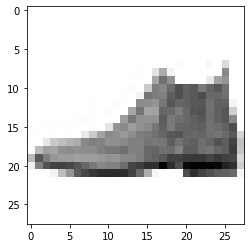

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
image = x_test[0]
image = (np.expand_dims(image,0))
image.shape

(1, 28, 28)

In [ ]:
predictions = model.predict(image)
predictions

array([[6.7388359e-11, 8.6274521e-12, 1.7420879e-12, 1.2220732e-11,
        2.3224162e-11, 2.8180574e-07, 3.2926505e-11, 1.1266491e-06,
        1.3343263e-10, 9.9999857e-01]], dtype=float32)

In [ ]:
prediction = predictions[0]
np.argmax(prediction)

9

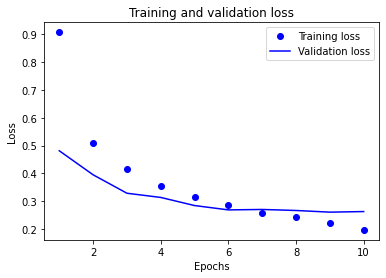

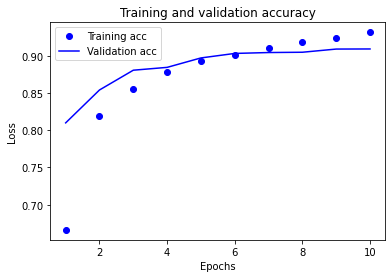

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()